<a href="https://colab.research.google.com/github/ayrna/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este cuaderno está basado en los cuadernos del libro [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

> This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.
> **If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**
> This notebook was generated for TensorFlow 2.6.

# Clasificación y regresión con redes neuronales

Los casos de uso más habituales con redes neuronales son problemas de clasificación (binaria o multiclase) o regresión:
* Clases: conjunto posible de etiquetas del problema.
* Etiqueta: específica a una muestra/patrón (la imagen #345 está etiquetada como "gato")
* Clasificación binaria: clasificación con dos categorías excluyentes
* Clasificación multiclase: tenemos varias categorías excluyentes.
* Claisifación multi-etiqueta: a cada muestra se le puede asignar varias etiquetas.
* Regresión escalar: la variable objetivo es una variable continua escalar.
* Regresión vectorial/vector: la variable objetivo es un vector de valores continuos.
* Lote/batch/mini-bach: un conjunto pequeño de muestras que se procesa simultáneamente (en entrenamiento o en inferencia) por las limitaciones de memoria. Normalmente se expresa en potencias de 2 entre 8 y 128.

## Ejemplo de clasificación binaria: reseñas de películas

### El conjunto de datos IMDB

Conjunto de datos IMDB: un conjunto de 50.000 reseñas **muy polarizadas** de la Internet Movie Database. Se dividen en 25.000 críticas para entrenamiento y 25.000 críticas para test, cada conjunto consta de un 50% de críticas negativas y un 50% de críticas positivas.

Al igual que el conjunto de datos MNIST, el conjunto de datos IMDB está disponible en Keras. Ya ha sido preprocesado: las reseñas (secuencias de palabras) se han convertido en secuencias de números enteros, donde cada número entero representa una palabra específica de un diccionario (reducido). Esto nos permite centrarnos en la construcción, entrenamiento y la evaluación del modelo.

**Cargar el conjunto de datos IMDB**
`num_words=10000` filtra a las palabras más frecuentes en los datos de entrenamiento de las 88.585 disponibles.



In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Las variables `train_data` y `test_data` son una secuencia de índices de las palabras de cada reseña.

Las etiquetas 0 y 1 significan que la reseña es *negativa* o *positiva* respectivamente.

In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
train_labels[0]

1

Como nos limitamos a las 10.000 palabras más frecuentes, ningún índice de palabras superará las 10.000:

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decodificar el texto de una reseña**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Ejemplo de una reseña negativa

In [6]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])
print(decoded_review)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
? this has to be one of the worst films of the 1990s when 

### Preparación de los datos

Las redes neuronales necesitan trabajar con datos del mismo tamaño. Por tanto , no se pueden introducir directamente listas variables de enteros en la red neuronal y tenemos que **convertir las listas en tensores**. Hay dos maneras de hacerlo:

 * Rellenar las listas para que todas tengan la misma longitud como un tensor entero de la forma (muestras, longitud_máxima), y utilizar la capa [`Embedding`](https://keras.io/api/layers/core_layers/embedding/)). Ver [Understanding Embedding Layer in Keras](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce) para ampliar.

* *Multi-hot encode*: Codificar las listas para convertirlas en vectores de 0s y 1s. Por ejemplo, convertir la secuencia [8, 5] en un vector de 10.000 dimensiones que sería todo 0s excepto los índices 8 y 5, que serían 1s. Así ya se podría usar una capa `Dense`, capaz de manejar datos vectoriales de punto flotante, como la primera capa del modelo.

**Codificando las secuencias de enteros como *multi-hot encoding***

Vectorización de los datos de entrada:

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorización de las etiquetas y transformación a `float32`:

In [9]:
type(train_labels)
type(train_labels[0])


numpy.int64

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Construcción del modelo

Despues del preprocesamiento, los datos de entrada son vectores, y las etiquetas son escalares (1s y 0s): esta es una de las configuraciones de problemas más simples que se pueden encontrar. Un tipo de modelo que funciona bien en este tipo de problemas es una pila simple de capas totalmente conectadas (`Dense`) con activaciones `relu`.

Hay dos decisiones clave de arquitectura que se deben tomar sobre tal pila de capas densas:

* Cuántas capas utilizar
* Cuántas unidades elegir para cada capa

En el capítulo 5 del libro ([Fundamentals of Machine Learning](https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-5)) se indican más principios y heurísticas para orientar la definición de la arquitectura.

Por el momento utilizaremos la siguiente arquitectura:
* 1 o 2 capas intermedias con varias unidades cada una
* Una tercera capa que emitirá la predicción escalar sobre la opinión de la reseña actual

Nota de traducción: **sentiment != sentimiento**



**Definición del modelo**

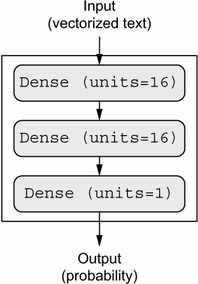



In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

El primer argumento que se pasa a cada capa Dense es el número de unidades de la capa: la dimensionalidad del espacio de representación de la capa.

Recordemos la implementación de cada capa:

```
output = relu(dot(input, W) + b)
```
Tener 16 unidades significa que la matriz de pesos `W` tendrá forma `(input_dimension, 16)`: el producto escalar con `W` proyectará los datos de entrada en un espacio de representación de 16 dimensiones (y luego añadirá el vector de sesgo `b` y aplicará la operación `relu`).

❓❓❓

¿Qué implicaciones tiene el aumento o reducción de la dimensionalidad de la capa

❓❓❓

Función relu:

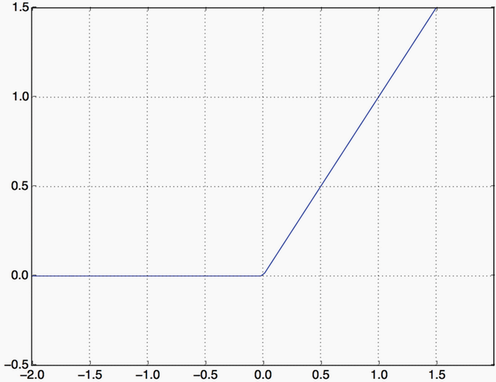

Función sigmoide:

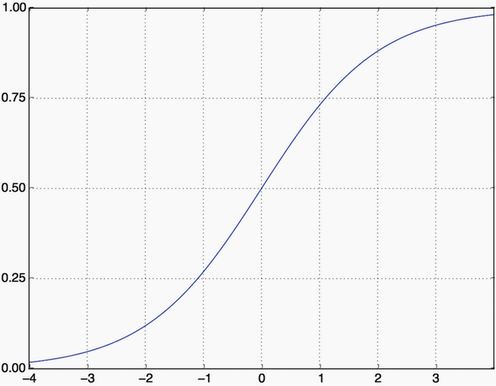

❓❓❓

¿Por qué son necesarias las funciones de activación?

❓❓❓

**Compilación del modelo**

Como función de pérdida alternativamente podríamos usar `mean_squared_error` aunque en principio la entropía cruzada es más adecuada para trabajar con datos probabilísticos ya que mide la distancia entre distribuciones de probabilidad (*Crossentropy*).

Resumen de la entropía cruzada:

* El error cuadrático medio ($MSE$) no es la función natural de error cuando tenemos salidas probabilísticas, ya que trata por igual cualquier diferencia de error.
* Para problemas de clasificación, deberíamos penalizar más los errores cometidos para la clase correcta ($d_j=1$) que para la incorrecta ($d_j=0$).
* La entropía cruzada ($-\ln $ verosimilitud) es más adecuada para problemas de clasificación ya que compara las dos distribuciones de probabilidad:
\begin{equation}
L = - \frac{1}{N\cdot J} \sum_{p=1}^N\left(\sum_{o=1}^J d_{po} \ln(o_{po}) \right)
\end{equation}


❓❓❓

**EJERCICIO:** ¿Cuáles serían las dos distribuciones de probabilidad?

❓❓❓

#### ¿Qué implicaciones tiene el aumento o reducción de la dimensionalidad de la capa
Aumentar el número de neuronas en una capa Dense incrementa la capacidad del modelo para capturar características de los datos de entrada, pero puede aumentar el riesgo de overfitting (sobreaprendizaje) si no hay suficientes datos de entrenamiento y/o no son lo suficientemente diversos. Por otro lado, reducir la dimensionalidad puede simplificar el modelo, pero podría perderse información importante en los datos. El aumento o reducción de la dimensionalidad debe ajustarse según cada problema, y el objetivo a conseguir, si se busca generalizar y se tienen pocos datos quizás lo mejor sea reducir números. Si el objetivo es conseguir sobreaprendizaje y se tienen muchos datos quizás lo mejor sería una mayor dimensionalidad.

#### ¿Por qué son necesarias las funciones de activación?
Las funciones de activación son necesarias en las redes neuronales para introducir no linealidades en el modelo, permitiendo así a la red aprender y representar relaciones complejas entre las características de entrada y las salidas deseadas. Sin ellas, la red se reduciría a una combinación lineal de sus entradas.

#### ¿Cuáles serían las dos distribuciones de probabilidad?

Las dos distribuciones de probabilidad son las etiquetas reales de los datos (ground truth) y las etiquetas predichas por el modelo.

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validación del modelo

**Reservar un conjunto de validación**

Nota: en este conjunto de datos se puede hacer porque los suponemos aleatorizados. Recuerda conceptos como estratificación al dividir el conjunto de datos en entrenamiento, validación y test❗❗❗.

In [13]:
print(x_train.shape)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(25000, 10000)


**Entrenar/ajustar el modelo**

Parámetros:
* Datos de entrenamiento y, opcionalmente, de validación
* Épocas
* Tamaño lotes

El siguiente código debería tardar unos 2 segundos por época:

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5413 - accuracy: 0.7839 - val_loss: 0.4303 - val_accuracy: 0.8381
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3379 - accuracy: 0.8931 - val_loss: 0.3245 - val_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2524 - accuracy: 0.9159 - val_loss: 0.2874 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2018 - accuracy: 0.9327 - val_loss: 0.2763 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1707 - accuracy: 0.9435 - val_loss: 0.2827 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1447 - accuracy: 0.9536 - val_loss: 0.2943 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1236 - accuracy: 0.9605 - val_loss: 0.2966 - val_accuracy: 0.8864
Epoch 8/20
30

Visualización del modelo:

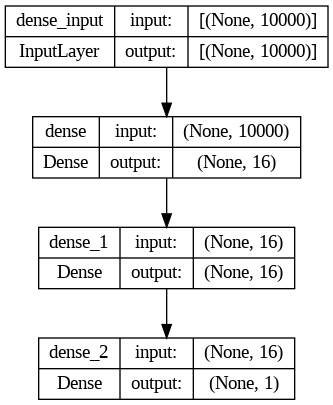

In [15]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

❓❓❓

**EJERCICIO:** ¿Por qué no hemos podido visualizar el modelo hasta ahora?

❓❓❓

Antes del entrenamiento no tenemos información completa sobre la estructura del modelo al no estar definido completamente, ya que los pesos y las conexiones entre capas se actualizan en función de los datos de entrenamiento. Después del entrenamiento, se puede visualizar el modelo completo con todas las conexiones y formas de capas.

Diccionario de historial del ajuste. En nuestro caso tiene 4 entradas, una por cada métrica que se ha monitorizado durante el entrenamiento y la validación.

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Dibujar la **función de pérdida** en entrenamiento y validación:

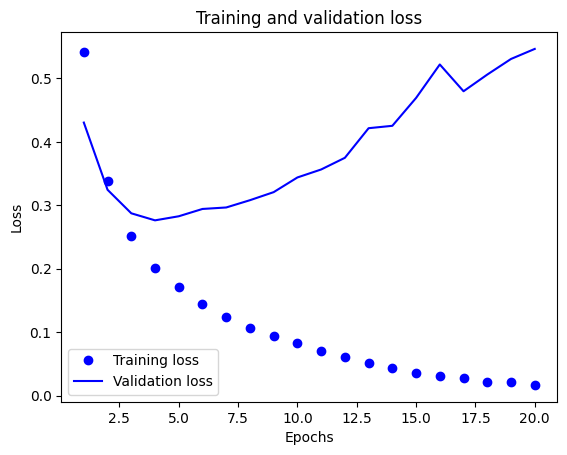

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Dibujar la precisión de entenamiento y validación:

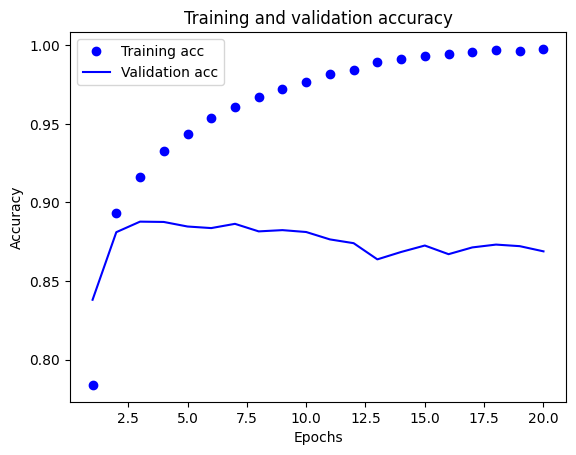

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

❓❓❓

**EJERCICIO**: ¿Qué observas en las gráficas anteriores?
¿Cómo podríamos tratar de arreglar el problema que observas? (incluye código y gráficas que lo solucione y visualice)

❓❓❓

Las gráficas de entrenamiento comienzan a converger adecuadamente pero a medida que avanzan las épocas no evolucionan mucho. Además, las gráficas de validación quedan muy por debajo que las de entrenamiento. En el caso de la de loss la gráfica de los datos de validación queda muy alejada de lo que espera, en vez de converger a un número menor, la pérdida va aumentando. Son gráficas características de un modelo que ha sobreaprendido. Esto quiere decir que el modelo se aprende de memoria las características de los datos de entrenamiento y no es capaz de generalizar a datos diferentes, como los de validación.

Hay diferentes soluciones que se podrían aplicar, entre otras, aplicar métodos de Data Augmentation, disminuír la dimensionalidad (así el modelo aprenderá menos características), disminuír el número de épocas, cambiar hiperparámetros como la función de pérdida...

A continuación se aplican algunos de estos cambios y se vuelven a mostrar las gráficas

**Reentrenar el modelo**

Después de nuestro análisis, podemos volver a reentrenar el modelo con otros parámetros. ¿Qué cambiarías?



```
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(...)
model.fit(...)
results = model.evaluate(x_test, y_test)
```

Haz tus pruebas aquí:

In [31]:
# Definir modelo
model = keras.Sequential([
    layers.Dense(4, activation="relu"), # Cambiar esta capa de 16 a 4 para disminuír dimensionalidad
    #layers.Dense(2, activation="relu"), # Cambiar esta capa de 16 a 2 para disminuír dimensionalidad y hacerla paso intermedio entre la anterior y la siguiente
    layers.Dense(1, activation="sigmoid")
])

# Compilar
model.compile(optimizer="Adam", # Optimizador cambiado a Adam
              loss="mse", # Cambio del loss
              metrics=["accuracy"])

# Entrenar
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5, # Reducir números de epochs a 5
                    batch_size=64, # Reducir para reducir el consumo de memoria
                    validation_data=(x_val, y_val),
                    shuffle=True)

history_dict = history.history
history_dict.keys()

Epoch 1/5
235/235 [==============================] - 4s 13ms/step - loss: 0.1874 - accuracy: 0.7688 - val_loss: 0.1542 - val_accuracy: 0.8511
Epoch 2/5
235/235 [==============================] - 2s 7ms/step - loss: 0.1279 - accuracy: 0.9117 - val_loss: 0.1307 - val_accuracy: 0.8809
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.0964 - accuracy: 0.9479 - val_loss: 0.1178 - val_accuracy: 0.8829
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0742 - accuracy: 0.9664 - val_loss: 0.1095 - val_accuracy: 0.8804
Epoch 5/5
235/235 [==============================] - 2s 8ms/step - loss: 0.0577 - accuracy: 0.9773 - val_loss: 0.1051 - val_accuracy: 0.8784


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

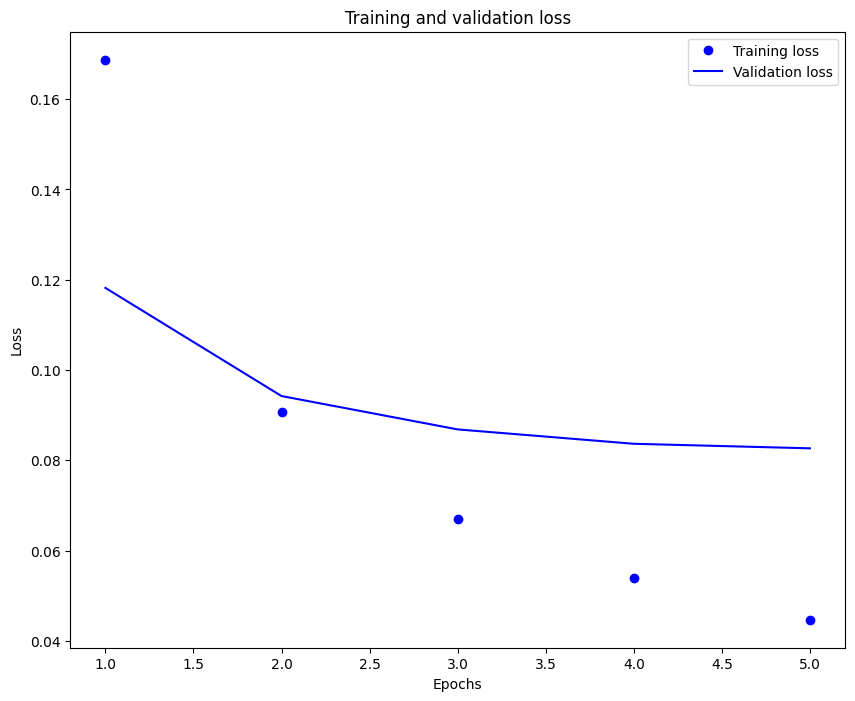

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

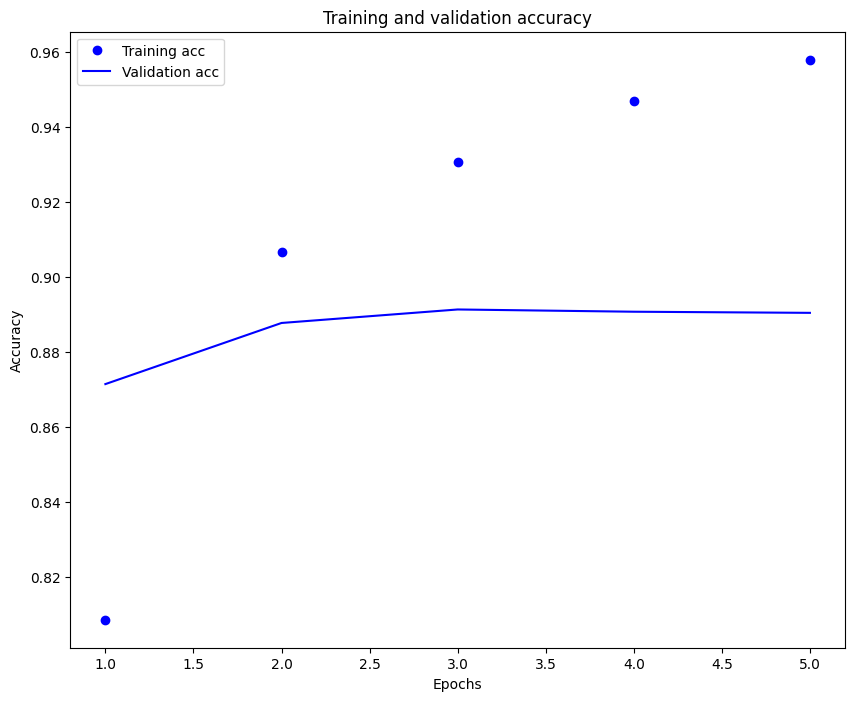

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Hacer predicciones en datos nuevos

In [22]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.36629733],
       [0.99659944],
       [0.9390918 ],
       ...,
       [0.3463696 ],
       [0.3463696 ],
       [0.61429185]], dtype=float32)

❓❓❓

**EJERCICIO**: Calcula la precisión global y la matriz de confusión en los datos de test (tienes ejemplos en cuadernos anteriores).

❓❓❓

782/782 [==============================] - 2s 2ms/step
Global Accuracy: 0.87188


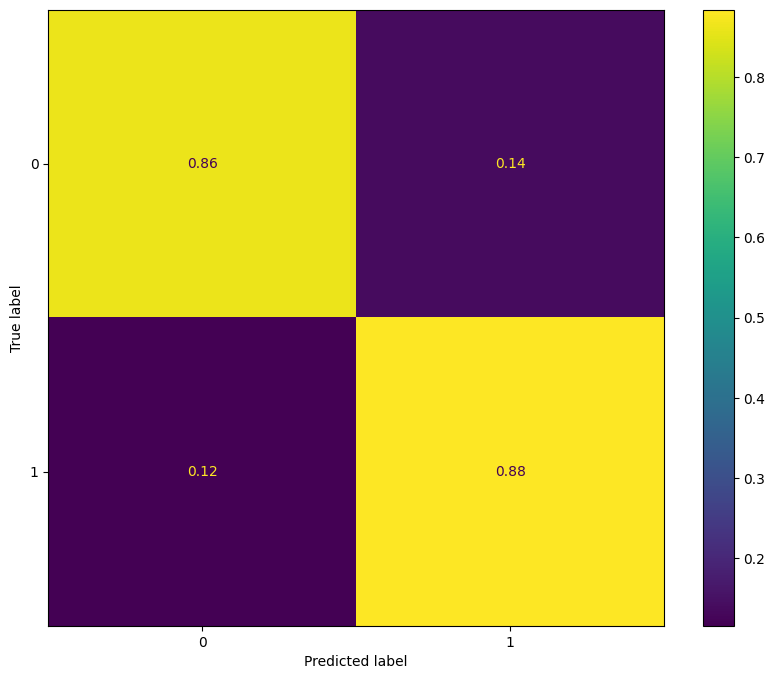

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Ajustar tamaño
plt.rcParams['figure.figsize'] = [10, 8]

# Obtener las predicciones del modelo en los datos de prueba
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas predichas
#y_pred = np.argmax(predictions, axis=1)
y_pred = np.zeros(predictions.shape)
y_pred[predictions>0.5] = 1

# Calcular la precisión global
accuracy = accuracy_score(y_test, y_pred)
print("Global Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize="true")
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

### Amplía experimentos:

Los siguientes experimentos te ayudarán a convencerte de que las elecciones de arquitectura que has hecho son bastante razonables, aunque todavía se puede mejorar:

* Hemos utilizado dos capas de representación antes de la capa de clasificación final. Prueba a utilizar una o tres capas ocultas y observa cómo afecta esto a la validación y a la  recisión de la prueba.
* Prueba a utilizar capas con más o menos unidades: 32 unidades, 64 unidades, etc.
* Prueba a utilizar la función de pérdida `mse` en lugar de `binary_crossentropy`.
* Prueba a utilizar la función de activación `tanh` en lugar de `relu`.


❓❓❓

**EJERCICIO**: Como hicimos anterioremente, trata de recoger todo el código del notebook en una sola celda que te permita experimental fácilmente con diferentes arquitecturas y parámetros. Puedes asumir que los datos están ya cargados y procesados y centrarte en los experimentos. Necesitarás:
1. Definir el modelo
1. Compilar el modelo
1. Ajustar el modelo
1. Dibujar gráfica de convergencia
1. Calcular la precisión en test

❓❓❓


Esta hecho en las celdas de arriba ya de esta manera

### Resumen
* Preprocesamiento
* Las pilas de capas `Dense` con `relu` pueden resolver muchos problemas
* En clasificación binaria siempre terminamos el modelo con una capa `Dense` y activación `sigmoid`.
* Por tanto usamos `binary_crossentropy`.
* Importancia de monitorizar el rendimiento.

## Clasificación multiclase: clasificación de noticias

* Clasificación binaria: categorías mútuamente exclusivas
* Clasificación multiclase
 * Clasificación multiclase de etiqueta única
 * Clasificación multiclase multi-etiqueta

### Conjunto de datos Reuterst

Es un conjunto de datos multi-etiqueta donde cada etiqueta representa un *tema* asociado a una noticia. Hay 46 temas diferentes con distinto nivel de representación.

Se puede trabajar como etiqueta simple considerando un tema único principal.

**Cargar el conjunto de datos Reuters**

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [35]:
print(len(train_data))
print(len(test_data))
print(train_data[10])
print(train_labels[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


**Descodificar las noticias a texto**

In [36]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 1s 1us/step


In [37]:
train_labels[3]

4

### Preparación de los datos

**Codificación de los datos**

In [38]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(8982, 10000)


**Codificación de las etiquetas**

Utilizaremos *one-hot encoding* también conocido como *codificación categórica*. Podemos usar la función anterior `to_one_hot` aunque en realidad Keras, scikit-learn y otros suelen tener funciones para esto:


In [40]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Veamos el resultado:

In [41]:
print(train_labels.shape)
print(test_labels.shape)
print(y_train.shape)
print(y_test.shape)

(8982,)
(2246,)
(8982, 46)
(2246, 46)


### Construcción del modelo

**Definición del modelo**

❓❓❓ **EJERCICIO:** ¿Qué valor pondrías en HHH y en XXX?❓❓❓

```
model = keras.Sequential([
    layers.Dense(HHH, activation="relu"),
    layers.Dense(HHH, activation="relu"),
    layers.Dense(XXX, activation="softmax")
])
```

En la última capa 46, ya que son las posibles salidas esperadas, en las anteriores se puede comenzar con cualquier número, por ejemplo 16. Y si sufre sobreaprendizaje intentar reducirlos.

In [46]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compilación del modelo**

❓❓❓ **EJERCICIO:** ¿Qué función de pérdida pondrías (ver <https://keras.io/api/losses/>)?❓❓❓

Al ser un problema probabilístico, habrá que usar una de probabilístico y categórico. Vamos a probar utilizando categoricalcrossentropy

In [51]:
model.compile(optimizer="rmsprop",
              loss=keras.losses.CategoricalCrossentropy(), # Sparse sería para enteros
              metrics=["accuracy"])

### Validación del diseño

**Conjunto de validación**

In [44]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Entrenamiento/ajuste del modelo**

In [52]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64, # Reducir por uso de memoria
                    validation_data=(x_val, y_val))

Epoch 1/20
125/125 [==============================] - 2s 10ms/step - loss: 2.4466 - accuracy: 0.4833 - val_loss: 1.5915 - val_accuracy: 0.5980
Epoch 2/20
125/125 [==============================] - 1s 7ms/step - loss: 1.3667 - accuracy: 0.6891 - val_loss: 1.2792 - val_accuracy: 0.7090
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 1.0835 - accuracy: 0.7610 - val_loss: 1.1645 - val_accuracy: 0.7400
Epoch 4/20
125/125 [==============================] - 1s 7ms/step - loss: 0.8964 - accuracy: 0.8049 - val_loss: 1.0899 - val_accuracy: 0.7570
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 0.7505 - accuracy: 0.8376 - val_loss: 1.0335 - val_accuracy: 0.7760
Epoch 6/20
125/125 [==============================] - 1s 8ms/step - loss: 0.6304 - accuracy: 0.8619 - val_loss: 1.0062 - val_accuracy: 0.7930
Epoch 7/20
125/125 [==============================] - 1s 11ms/step - loss: 0.5326 - accuracy: 0.8832 - val_loss: 1.0093 - val_accuracy: 0.7930
Epoc

**Dibujar la pérdida de entrenamiento y validación**

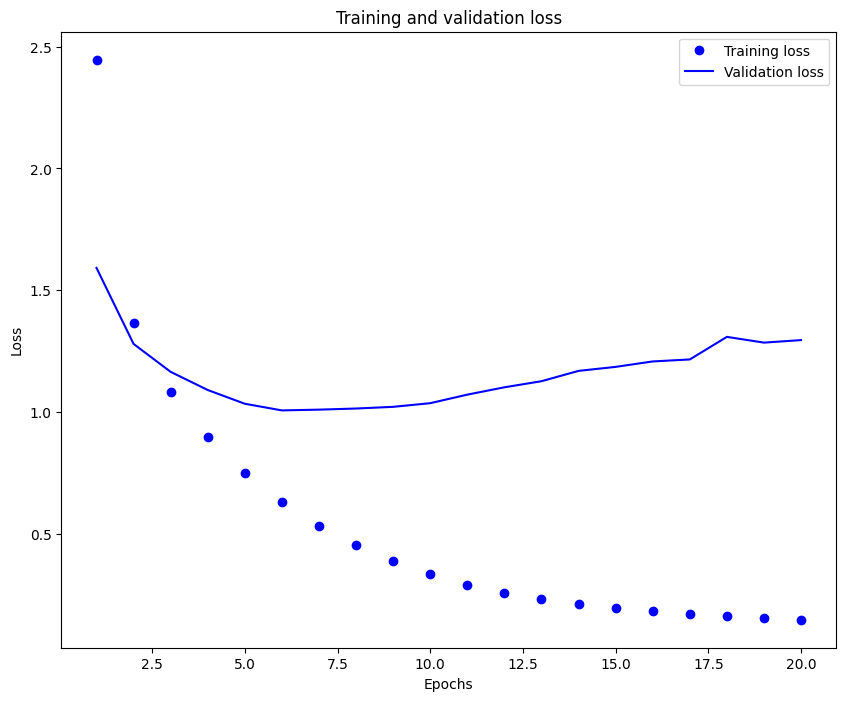

In [53]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Dibujar la precisión en entrenamiento y validación**



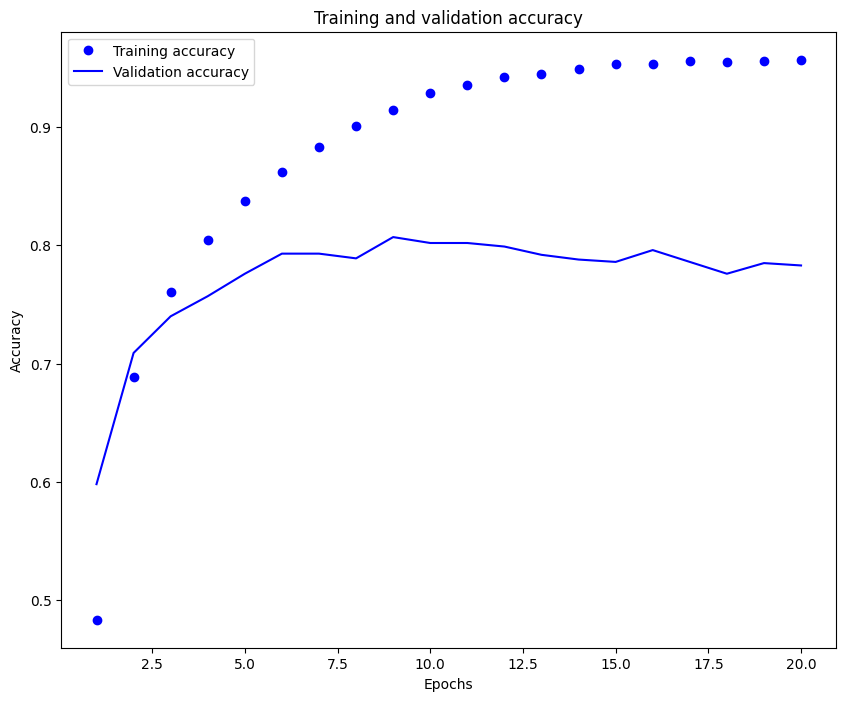

In [54]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

❓❓❓
**EJERCICIO:**
* ¿Detectas sobreajuste?¿Cómo podemos mitigarlo?

Sí, las gráficas de validación están muy por debajo de las de entrenamiento y al final las de entrenamiento siguen sin evolucionar

* ¿Qué pasa si usas 1 o 3 capas y con distinto número de neuronas (e.j. 8,64,128)?

Añadir o quitar capas y ajustar el número de neuronas afecta la complejidad y capacidad del modelo para capturar patrones en los datos. Una sola capa puede simplificar el modelo pero puede perderse información importante. Tres capas pueden aumentar la capacidad de captura de patrones, pero también aumentan el riesgo de sobreajuste. El número de neuronas en cada capa determina la complejidad de la representación aprendida, con menos neuronas simplificando el modelo y más neuronas permitiendo una representación más detallada pero potencialmente más compleja.


**Reentrenemos desde cero con nuestras conclusiones**
❓❓❓

In [60]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))



Epoch 1/10
141/141 [==============================] - 2s 10ms/step - loss: 2.0433 - accuracy: 0.6086 - val_loss: 1.2646 - val_accuracy: 0.7270
Epoch 2/10
141/141 [==============================] - 1s 8ms/step - loss: 1.1764 - accuracy: 0.7359 - val_loss: 0.9368 - val_accuracy: 0.7780
Epoch 3/10
141/141 [==============================] - 1s 8ms/step - loss: 0.9233 - accuracy: 0.7960 - val_loss: 0.7302 - val_accuracy: 0.8350
Epoch 4/10
141/141 [==============================] - 2s 12ms/step - loss: 0.7362 - accuracy: 0.8306 - val_loss: 0.5686 - val_accuracy: 0.8690
Epoch 5/10
141/141 [==============================] - 1s 10ms/step - loss: 0.5898 - accuracy: 0.8680 - val_loss: 0.4453 - val_accuracy: 0.9100
Epoch 6/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4780 - accuracy: 0.8942 - val_loss: 0.3753 - val_accuracy: 0.9260
Epoch 7/10
141/141 [==============================] - 1s 8ms/step - loss: 0.3941 - accuracy: 0.9113 - val_loss: 0.3080 - val_accuracy: 0.9350
Epo

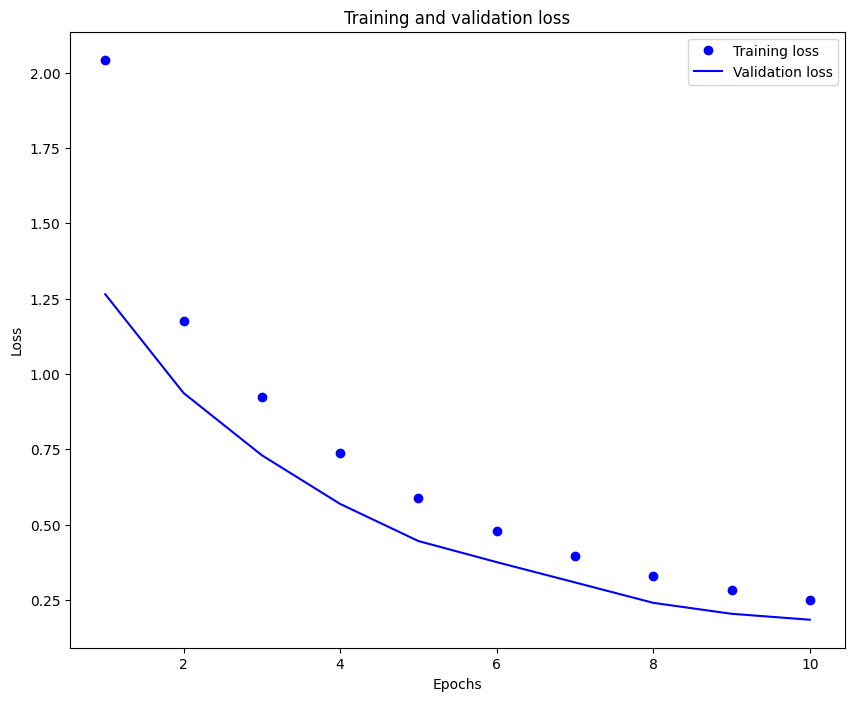

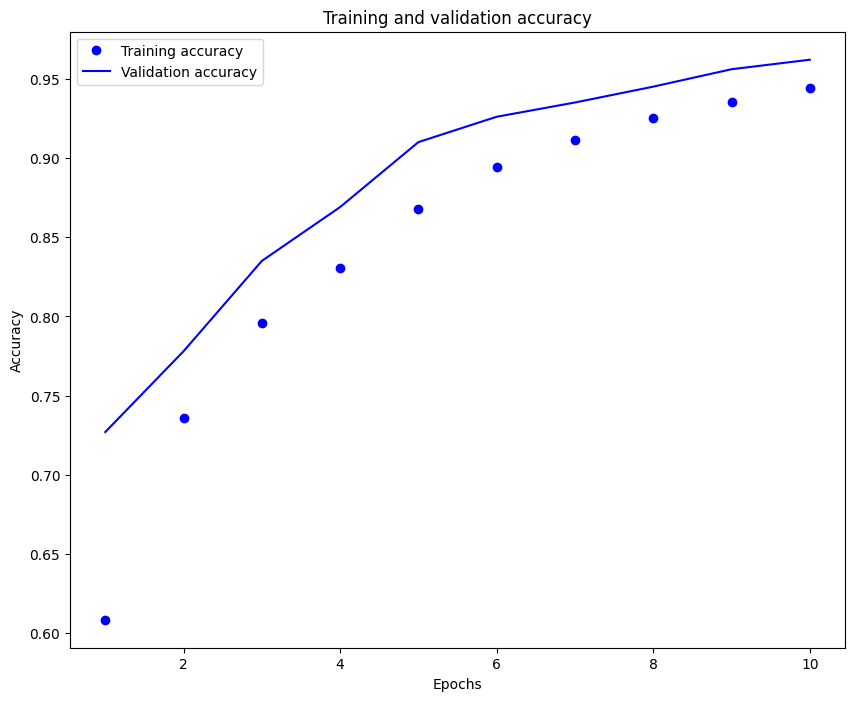

In [61]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

En esta ocasión el modelo generaliza muy bien consiguiendo mejor rendimiento en validación, un conjunto de datos "no antes visto", que en el entrenamiento.

Evaluamos en test:

In [63]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 1.1479 - accuracy: 0.7836


[1.1479412317276, 0.7836152911186218]

¿Cómo interpretamos estos resultados?¿Son buenos o malos? Para esto tenemos que estimar el rendimiento base. El rendimiento base en un problema binario perfectamente balanceado sería del 50% (un clasificador aleatorio). ¿Cuál es en nuestro caso?

In [64]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19145146927871773

### Generar predicciones/salidas sobre datos nuevos

In [65]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [66]:
predictions[0].shape

(46,)

In [67]:
np.sum(predictions[0])

1.0

In [68]:
np.argmax(predictions[0])

3

### Otra forma de codificar las etiquetas y la pérdida

Como tensor de enteros:

In [69]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Esta variante necesita una función de pérdida diferente:

In [70]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### La importancia de tener capas intermedias suficientemente grandes

grandes ➡ anchas

Antes hemos mencionado que, como la capa de salida tiene 46 dimensiones, hay que evitar las capas intermedias con muchas menos de 46 unidades. Veamos qué sucede cuando introducimos un “cuello de botella” de información al tener capas intermedias que son significativamente menos de 46 dimensiones: por ejemplo, de 4 dimensiones.

**Ejemplo de modelo con un cuello de botella**

In [71]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 3.2569 - accuracy: 0.1582 - val_loss: 2.6421 - val_accuracy: 0.5540
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 2.0704 - accuracy: 0.5925 - val_loss: 1.7274 - val_accuracy: 0.5900
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 1.5532 - accuracy: 0.6164 - val_loss: 1.5557 - val_accuracy: 0.6210
Epoch 4/20
63/63 [==============================] - 2s 25ms/step - loss: 1.4115 - accuracy: 0.6495 - val_loss: 1.5005 - val_accuracy: 0.6320
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3197 - accuracy: 0.6616 - val_loss: 1.4733 - val_accuracy: 0.6340
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 1.2406 - accuracy: 0.6723 - val_loss: 1.4433 - val_accuracy: 0.6340
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1696 - accuracy: 0.6827 - val_loss: 1.4283 - val_accuracy: 0.6570
Epoch 8/20
63

### Experimentos adicionales

❓❓❓
**EJERCICIO:**

Después de los experimentos: ¿Cuáles son los parámetros óptimos de tu modelo?

❓❓❓

Se podría haber seguido experimentando, pero hasta el momento, los mejores hiperparámetros encontrados con la experimentación son los del segundo modelo entrenado

### Resumen

* ¿Cuántas neuronas de salida tienen los modelos anteriores?
46

* ¿Cuándo utilizamos la función softmax y cuándo la sigmoide?
La función softmax se utiliza en la capa de salida de modelos de clasificación multiclase, mientras que la función sigmoide se utiliza en problemas de clasificación binaria o en la última capa de un modelo cuando se predice una única probabilidad.

* ¿Qué opciones tenemos para representar las etiquetas en un problema multiclase?
Para representar las etiquetas en un problema multiclase, podemos utilizar codificación one-hot, que convierte cada etiqueta en un vector binario donde solo una posición corresponde a la clase y todas las demás son cero. Otra opción es utilizar etiquetas enteras donde cada clase tiene un número único.

* ¿Qué principios podemos seguir para diseñar la arquitectura de la red?
Al diseñar la arquitectura de la red, podemos seguir principios como la simplicidad, comenzar con una arquitectura básica y aumentar la complejidad según sea necesario, utilizar capas y neuronas suficientes para capturar los patrones de los datos. O empezar con complejidad e ir reduciendo evitando el sobreaprendizaje. Y utilizar técnicas para evitar el sobreaprendizaje.

## Ejemplo de regresión: predicción de precios inmobiliarios

### Base de datos Boston Housing Price


**Carga de Boston housing dataset**

In [72]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [73]:
train_data.shape

(404, 13)

In [74]:
test_data.shape

(102, 13)

In [75]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preprocesado

**Normalizing the data**

In [76]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

### Construcción del modelo

**Definition**

Esta función será útil para el diseño experimental KFold.

In [77]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validando el diseño con validación K-fold

**K-fold validation**

In [78]:
from sklearn.model_selection import KFold

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_data):
  X_train, X_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]

  # Build and compile the model
  model = build_model()

  # Train the model
  model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, verbose=0)

  # Evaluate the model
  val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)

  all_scores.append(val_mae)

In [79]:
all_scores

[2.6544060707092285,
 2.2973973751068115,
 2.6872482299804688,
 2.2291088104248047]

In [80]:
import numpy as np
np.mean(all_scores)

2.4670401215553284

**Guardar los logs de validación de cada fold**

In [81]:
from sklearn.model_selection import KFold

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100 # aumentar a 500
all_mae_histories = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_data):
  X_train, X_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]

  # Build and compile the model
  model = build_model()

  # Train the model
  history = model.fit(X_train, y_train, epochs=num_epochs,
                      validation_data=(X_val, y_val),
                      batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)


**Procesamos el historial**

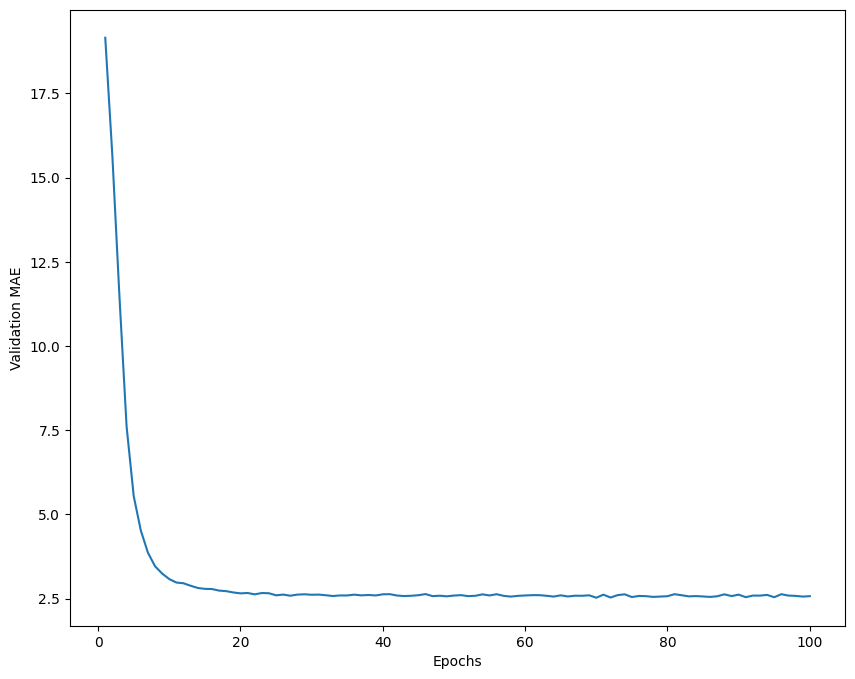

In [82]:
import matplotlib.pyplot as plt
import numpy as np

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Dibujar la puntuación de validación excluyendo los 10 primeros puntos**

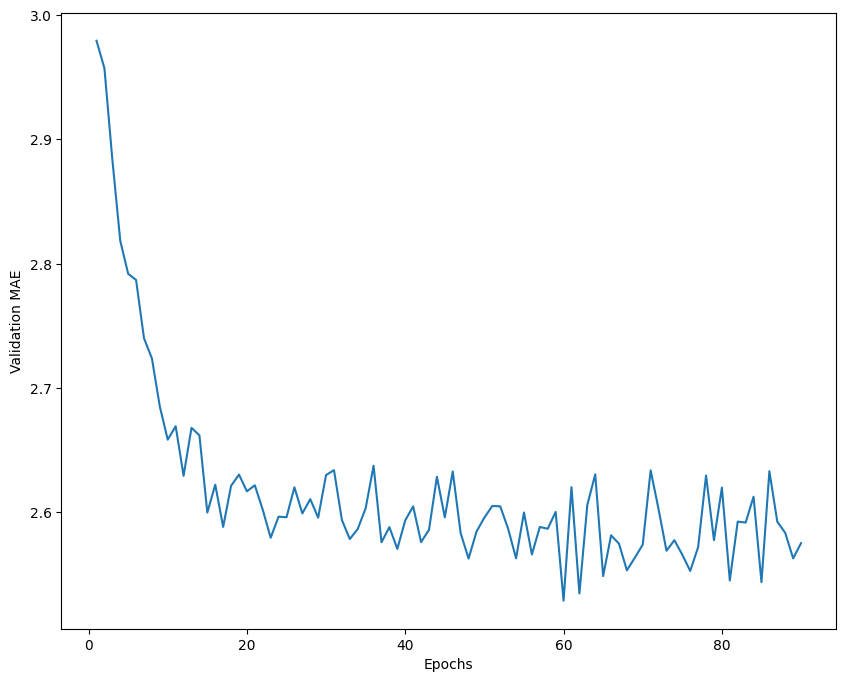

In [83]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Entrenamos el modelo final**

In [84]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 13.6537 - mae: 2.5482


In [85]:
test_mae_score

2.548173189163208

### Predicciones con datos nuevos

In [86]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.350742], dtype=float32)